# Task-4: Stock Market Prediction using Numerical and Textual Analysis


# Submitted by: Soyabul Islam

<br>
<br>
<br>





### Importing Necessary Libraries

In [1]:
!pip install wordcloud
!pip install textblob
!pip install vaderSentiment
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [79]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_curve, auc


<br>
<br>
<br>

## Importing data using pandas 

In [4]:
news=pd.read_csv('C:\intern 2\india-news-headlines.csv')
DJIA= pd.read_csv('C:\intern 2\Combined_News_DJIA.csv')
DJIA_table= pd.read_csv('upload_DJIA_table.csv')

In [5]:
print(f'Sample news headline')
print('---------------------')
print(news.head(10))
print(f'Combined news')
print('---------------------')
print(DJIA.head())
print(f'DJIA_table')
print('---------------------')
print(DJIA_table.head())

Sample news headline
---------------------
   publish_date headline_category  \
0      20010101        sports.wwe   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   
5      20010102           unknown   
6      20010102           unknown   
7      20010102           unknown   
8      20010102           unknown   
9      20010102           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa  
5               Extra buses to clear tourist traffic  
6        Dilute the power of transfers; says Riberio  
7                  Focus shifts to teaching of Hindi  
8               IT will become compulsory in schools  

<br> 
<br>
<br>
<br>
<br>

<p style='font-size:150%'><b>Lets see the informations about imported data</b></p>

In [6]:
print(news.info())
print(DJIA.info())
print(DJIA_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   o

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Is there any null values in our dataset? Let's find out.</b></p>

In [7]:
news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [8]:
DJIA.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [9]:
DJIA_table.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Combine headlines with respect to row</b></p>

In [10]:
combined_headlines=[]
for i in range(0, len(DJIA)):
    combined_headlines.append(' '.join(str(j) for j in DJIA.iloc[i,2:27]))
    
combined_headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Removing unnecessary punctuations from the data</b></p>

In [11]:
clean=[]
for i in range(0, len(combined_headlines)):
    clean.append(re.sub("b[(')]+", '', combined_headlines[i] ))
    clean[i] = re.sub('b[(")]+', '', clean[i] )
    clean[i] = re.sub("\'", '', clean[i] )
    
clean[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Create a new column names "Combined_news" and assign cleaned headlines here.</b></p>

In [12]:
DJIA['Combined_news']= clean
DJIA.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Creating a wordcloud visualization</b></p>

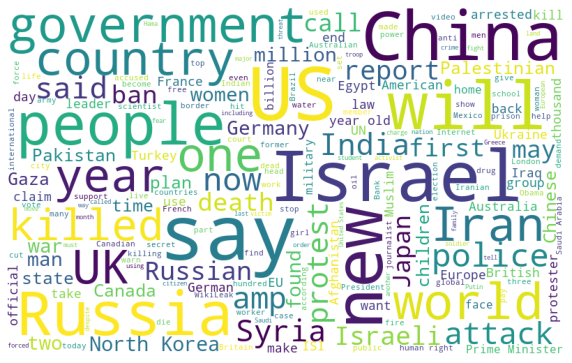

In [13]:
word_density=' '.join([text for text in DJIA['Combined_news']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21, background_color='white').generate(word_density)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Visualizing stock with different parameters</b></p>

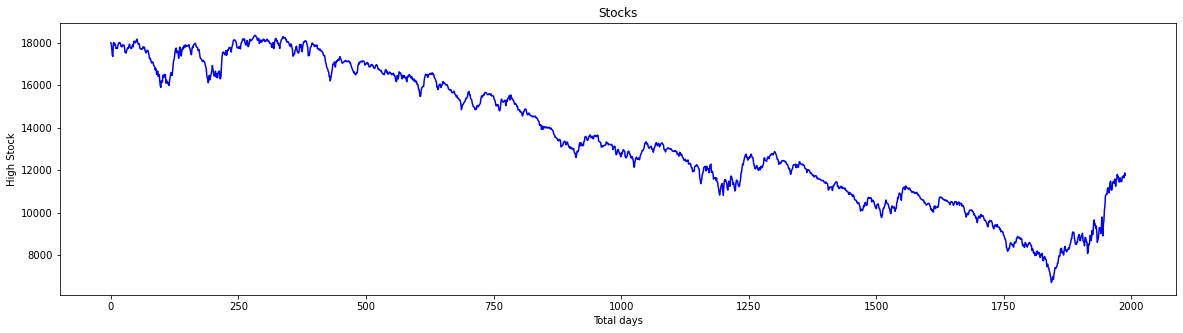

In [82]:

plt.figure(figsize = (20, 5))

df1=DJIA_table['High']
plt.title('Stocks')
plt.xlabel('Total days')
plt.ylabel('High Stock')
plt.plot(df1, color = 'blue')
plt.show()

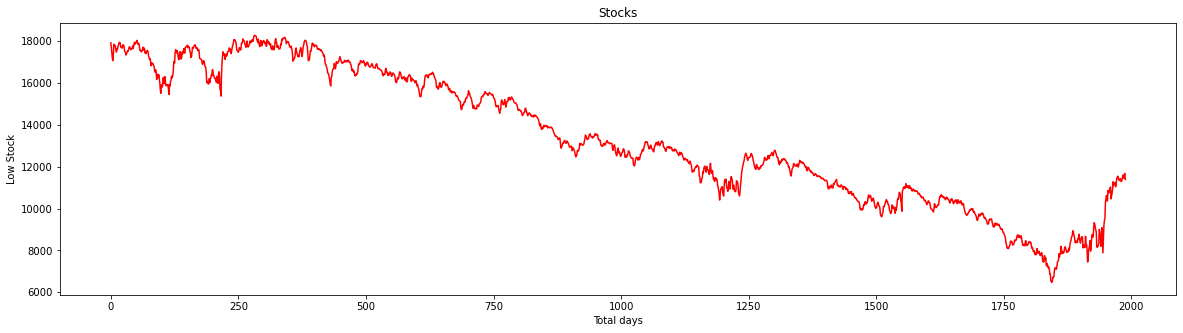

In [83]:
plt.figure(figsize = (20, 5))

df2 = DJIA_table['Low']
plt.title('Stocks')
plt.xlabel('Total days')
plt.ylabel('Low Stock')

plt.plot(df2, color = 'red')
plt.show()

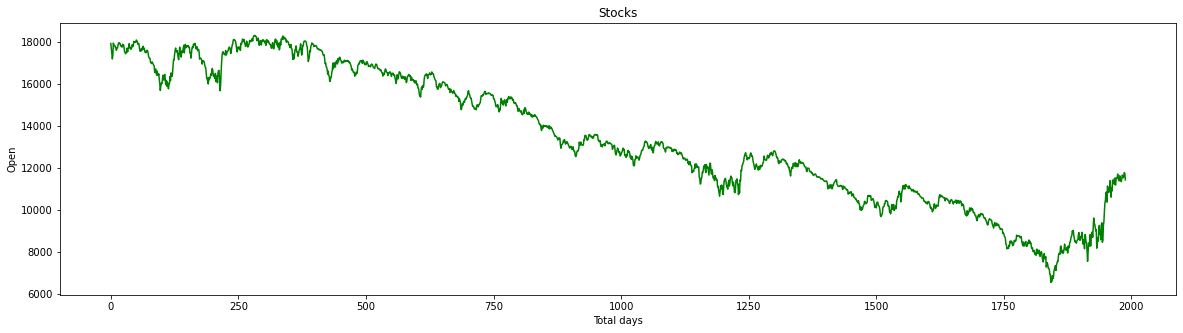

In [84]:
plt.figure(figsize = (20, 5))

df_open = DJIA_table['Open']
plt.title('Stocks')
plt.xlabel('Total days')
plt.ylabel('Open')

plt.plot(df_open, color = 'green')
plt.show()

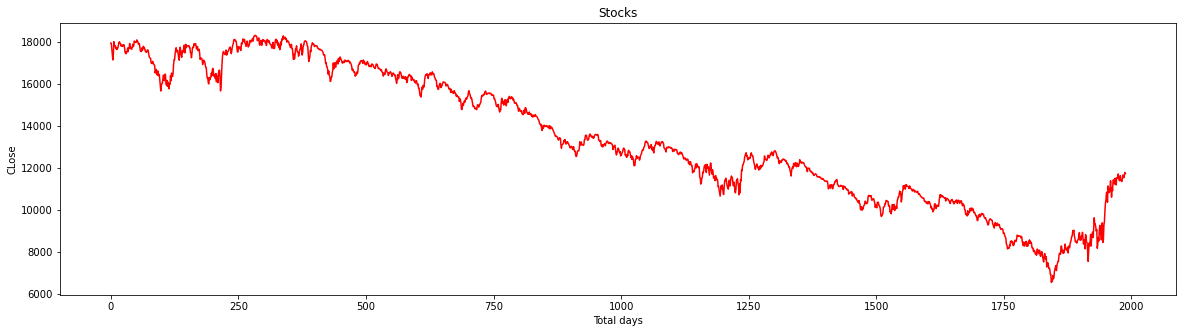

In [85]:
plt.figure(figsize = (20, 5))

df_close = DJIA_table['Close']
plt.title('Stocks')
plt.xlabel('Total days')
plt.ylabel('CLose')

plt.plot(df_close, color = 'red')
plt.show()

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Merging two tables</b></p>

In [87]:
merge= DJIA.merge(DJIA_table, how='inner', on='Date', left_index=True)
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_news,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [19]:
merge.shape

(1989, 34)

In [20]:
merge.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_news    0
Open             0
High             0
Low              0
Close            0
Volume           0
Adj Close        0
dtype: int64

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b> Handling null values</b></p>

In [21]:
merge.fillna(0, inplace= True)
merge.reset_index(inplace = True,drop=True)

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Getting Subjectivity and Polarity of a sentence.</b></p><br>
<br>
<p>A sentence could be stating a fact( objective) or expressing an opinion( subjective). Determining this is a classification of a sentence as being objective or subjective.</p>

In [60]:
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [61]:
merge['Subjectivity']= merge['Combined_news'].apply(Subjectivity)
merge['Polarity']= merge['Combined_news'].apply(getPolarity)
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Low,Close,Volume,Adj Close,Subjectivity,Polarity,Compound,Neutral,Positive,Negative
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11388.040039,11734.320312,212830000,11734.320312,0.267549,-0.048568,-0.9982,0.724,0.041,0.235
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11675.530273,11782.349609,183190000,11782.349609,0.374806,0.121956,-0.9858,0.721,0.089,0.191
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11601.519531,11642.469727,173590000,11642.469727,0.536234,-0.044302,-0.9715,0.816,0.056,0.128
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11453.339844,11532.959961,182550000,11532.959961,0.364021,0.011398,-0.9809,0.788,0.066,0.146
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11450.889648,11615.929688,159790000,11615.929688,0.375099,0.040677,-0.9882,0.717,0.094,0.189


<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Extracting sentiment from headlines</b></p><br>

In [24]:
results = []

for i in merge['Combined_news']:
    pol_score = SentimentIntensityAnalyzer().polarity_scores(i) # run analysis
    pol_score['headline'] = i # add headlines for viewing
    results.append(pol_score)

results[1]

{'neg': 0.191,
 'neu': 0.721,
 'pos': 0.089,
 'compound': -0.9858,
 'headline': 'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq? Bush puts foot down on Georgian conflict Jewish Georgian minister: Thanks to Israeli training, were fending off Russia " Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired Olympic opening ceremony fireworks faked" What were the Mossad with fraudulent New Zealand Passports doing in Iraq? Russia angered by Israeli military sale to Georgia An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people Welcome To World War IV! Now In High Definition! Georgias move, a mistake of monumental proportions " Russia presses deeper into Georgia; U.S. says regime change is goal Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  U.S. ship heads for Arctic to define territory Drivers in a Jerusalem taxi station threat

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>#Adding sentiment score or Polarity scores in dataframe</b></p><br>

In [25]:
merge['Compound']=pd.DataFrame(results)['compound']
merge['Neutral']=pd.DataFrame(results)['neu']
merge['Positive']=pd.DataFrame(results)['pos']
merge['Negative']=pd.DataFrame(results)['neg']
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Low,Close,Volume,Adj Close,Subjectivity,Polarity,Compound,Neutral,Positive,Negative
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11388.040039,11734.320312,212830000,11734.320312,0.267549,-0.048568,-0.9982,0.724,0.041,0.235
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11675.530273,11782.349609,183190000,11782.349609,0.374806,0.121956,-0.9858,0.721,0.089,0.191
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11601.519531,11642.469727,173590000,11642.469727,0.536234,-0.044302,-0.9715,0.816,0.056,0.128
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11453.339844,11532.959961,182550000,11532.959961,0.364021,0.011398,-0.9809,0.788,0.066,0.146
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11450.889648,11615.929688,159790000,11615.929688,0.375099,0.040677,-0.9882,0.717,0.094,0.189


In [25]:
merge.reset_index(inplace=True)

In [26]:
merge.shape

(1989, 41)

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Organizing data and removing unnecessary columns</b></p><br>

In [26]:
cols = list(merge)
print(cols)
columns=['Date', 'Label', 'Subjectivity', 'Polarity', 'Positive', 'Negative', 'Neutral','Compound', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
merged_dataframe = merge[columns]
merged_dataframe.head()

['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25', 'Combined_news', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Subjectivity', 'Polarity', 'Compound', 'Neutral', 'Positive', 'Negative']


,Date,Label,Subjectivity,Polarity,Positive,Negative,Neutral,Compound,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,0.267549,-0.048568,0.041,0.235,0.724,-0.9982,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,0.374806,0.121956,0.089,0.191,0.721,-0.9858,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,0.536234,-0.044302,0.056,0.128,0.816,-0.9715,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,0.364021,0.011398,0.066,0.146,0.788,-0.9809,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,0.375099,0.040677,0.094,0.189,0.717,-0.9882,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [27]:
merged_dataframe.describe()

,Label,Subjectivity,Polarity,Positive,Negative,Neutral,Compound,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,0.535445,0.361426,0.022722,0.065675,0.162315,0.772018,-0.957369,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,0.498867,0.060884,0.053687,0.020968,0.038575,0.041819,0.199673,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,0.000000,0.161332,-0.225978,0.007000,0.059000,0.588000,-0.999500,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,0.000000,0.321410,-0.011461,0.051000,0.135000,0.746000,-0.996400,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,1.000000,0.361652,0.024870,0.064000,0.159000,0.773000,-0.993200,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,1.000000,0.400533,0.057980,0.079000,0.188000,0.802000,-0.985500,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,1.000000,0.615242,0.195774,0.153000,0.316000,0.894000,0.991700,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


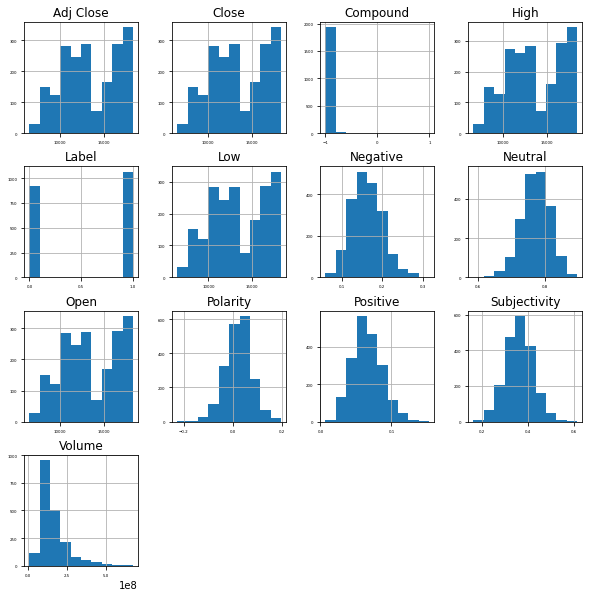

In [28]:
merged_dataframe.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Correlation between columns represented by heatmap</b></p><br>

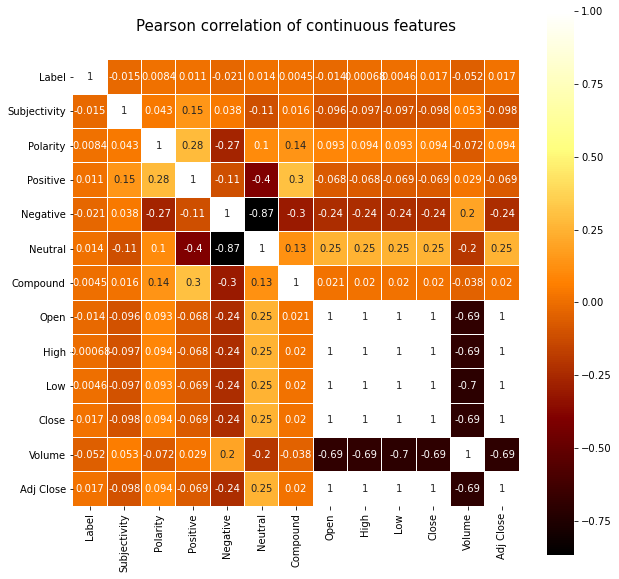

In [29]:
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=plt.cm.afmhot, linecolor='white', annot=True)
plt.show()

In [38]:
x =merged_dataframe.drop(['Label', 'Date'], axis=1)

y =merged_dataframe['Label']

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Splitting dataset from train and test</b></p><br>

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1, stratify= y)

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Assigning different models for evaluation</b></p><br>

In [43]:
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))


In [44]:
for name, model in models:
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accu_score = accuracy_score(y_test, y_pred)
    print(name + ": " + str(accu_score))
    

LR: 0.5240963855421686
LDA: 0.9497991967871486
KNN: 0.4879518072289157
CART: 0.5682730923694779
NB: 0.5261044176706827
SVM: 0.5261044176706827
RF: 0.606425702811245


<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>LR: 0.5240963855421686<br>
LDA: 0.9497991967871486<br>
KNN: 0.4879518072289157<br>
CART: 0.5682730923694779<br>
NB: 0.5261044176706827<br>
SVM: 0.5261044176706827<br>
RF: 0.606425702811245</b></p><br>
<span style="font-size:150%; color:blue"><b>As we can see LinearDissimilarityAnalysis model shows best result with highest accuracy</b></span>


<br>
<br>
<br>
<p style='font-size:150%'><b>Preprocessing data for better performance</b></p>

In [49]:
scaled= StandardScaler().fit_transform(x_train)
lda= LinearDiscriminantAnalysis()
lda.fit(scaled, y_train)
scale_val= StandardScaler().fit_transform(x_test)
prediction= lda.predict(scale_val)
print("accuracy score:")
print(accuracy_score(y_test, prediction))
print("confusion matrix: ")
print(confusion_matrix(y_test, prediction))
print("classification report: ")
print(classification_report(y_test, prediction))

accuracy score:
0.929718875502008
confusion matrix: 
[[210  21]
 [ 14 253]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       231
           1       0.92      0.95      0.94       267

    accuracy                           0.93       498
   macro avg       0.93      0.93      0.93       498
weighted avg       0.93      0.93      0.93       498



<br>
<br>
<br>
<br>
<p style='font-size:150%'><b> AUC score:</b></p>

ROC auc is :0.5


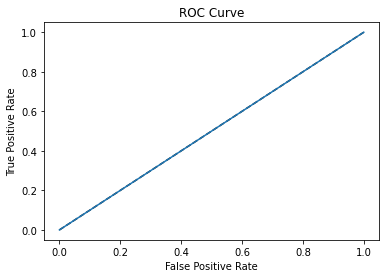

AUC using cross val: [0.99267399 0.99653979 0.975      0.99173554 0.96428571 1.
 0.99173554 0.99       1.         1.         0.98161765 0.98076923
 0.97407407 0.97777778 0.96992481]
Mean AUC score is: 0.9857422743624933


C:\anaconda\anacondaInstall\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [88]:
y_pred = lda.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


print("ROC auc is :" + str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


kfold_val = KFold(n_splits=15, random_state=42)
auc_score = cross_val_score(lda, x_test, y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

In [54]:
prediction

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,

<br>
<br>
<br>
<br>
<p style='font-size:150%'><b>Mean Squared Error</b></p>

In [56]:
mse= mean_squared_error(y_test, prediction )
mse

0.07028112449799197

<br>
<br>
<br>
<br>
<p style='font-size:200%'><b>LDA shows accuracy of about 92.9% and outranks other models.</b></p>